<a href="https://colab.research.google.com/github/cisirtraining/summerschool/blob/master/K_Nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##K Nearest Neighbor

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations  $(x,y)$  and would like to capture the relationship between  $x$  and  $y$ . More formally, our goal is to learn a function  $h:X→Y$  so that given an unseen observation  $x$ ,  $h(x)$  can confidently predict the corresponding output  $y$ .

KNN can be used for both classification and regression predictive problems. In the classification setting, the *K*-nearest neighbor algorithm essentially boils down to forming a majority vote between the *K* most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. The *k*-nearest-neighbor classifier is commonly based on the Euclidean distance between a test sample and the specified training samples. Let  $x_i$  be an input sample with  *p*  features  $(x_{i1},x_{i2},...,x_{ip})$ ,  $n$  be the total number of input samples  $(i=1,2,...,n)$ . The Euclidean distance between sample $ x_i$  and  $x_l$  is is defined as:

$d(x_i,x_l)=(x_{i1}−x_{l1})^2+(x_{i2}−x_{l2})^2+...+(x_{ip}−x_{lp})^2$
 
Sometimes other measures can be more suitable for a given setting and include the Manhattan, Chebyshev and Hamming distance.

##Importing the dataset

Put 'Iris.csv' in a folder name 'data' within your google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


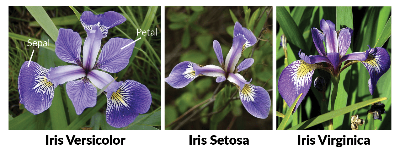

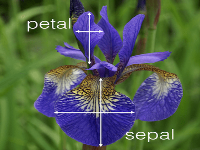

In [0]:
from google.colab.patches import cv2_imshow

import cv2
img1 = cv2.imread('./drive/My Drive/data/Iris_example.png', cv2.IMREAD_UNCHANGED)
img2 = cv2.imread('./drive/My Drive/data/Iris_example2.png', cv2.IMREAD_UNCHANGED)

cv2_imshow(cv2.resize(img1,(400,150)))
cv2_imshow(cv2.resize(img2,(200,150)))

In [7]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('./drive/My Drive/data/Iris.csv')
print('Dataset total sample: ', dataset.shape[0])
print('Dataset features: ', list(dataset.columns[1:4]))
print('Dataset classes: ', dataset.Species.unique())

Dataset total sample:  150
Dataset features:  ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm']
Dataset classes:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


##Pairplot

Visualizing the distribution of a variable or the relationship between multiple variables separately within subsets of the dataset. We can see that one of the classes is linearly separable, but the other two are not.

<Figure size 432x288 with 0 Axes>

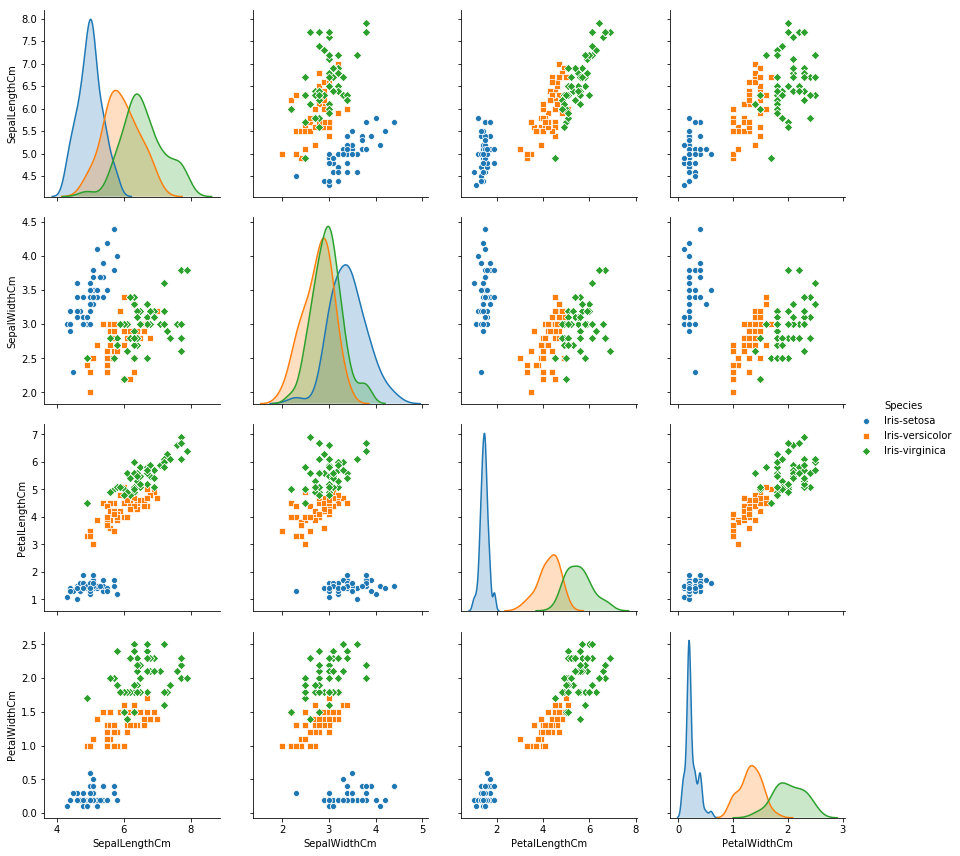

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", height=3, markers=["o", "s", "D"])
plt.show()

##Boxplots

<Figure size 432x288 with 0 Axes>

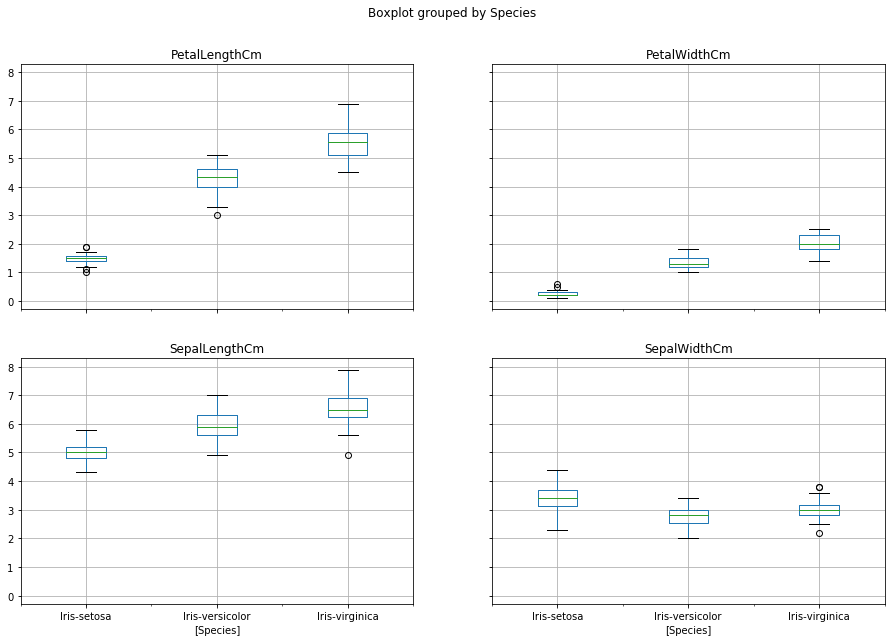

In [0]:
plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

##Decision boundary rountine

To show decision region

In [0]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', 
                   alpha=1.0, linewidth=1, marker='o',
                   s=55, label="test set")

##Data preparation

Dat splitting and rescale the data

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from operator import itemgetter 

idx = [0,2]
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 
                   'PetalLengthCm', 'PetalWidthCm']
X = dataset[list(itemgetter(*idx)(feature_columns))].values
y = dataset['Species'].values
print('Features: ', itemgetter(*idx)(feature_columns))
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# For many machine learning algorithms, it is important to scale the data.
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

Features:  ('SepalLengthCm', 'PetalLengthCm')


##KNN Algorithm

STEP 1: Choose the number *K* of neighbors

STEP 2: Take the *K* nearest neighbors of the new data point, according to your distance metric

STEP 3: Among these *K* neighbors, count the number of data points to each category

STEP 4: Assign the new data point to the category where you counted the most neighbors

In [0]:
from sklearn.neighbors import KNeighborsClassifier

k = 6
knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train_std, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test_std, y_test)))

The accuracy of the knn classifier is 0.95 out of 1 on training data
The accuracy of the knn classifier is 0.93 out of 1 on test data


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


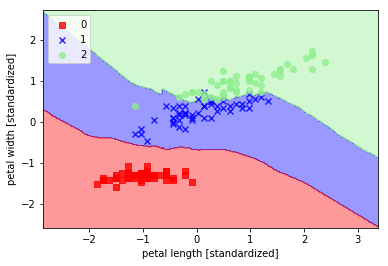

In [0]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=knn, test_idx=None) # range(120,150)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()